### Import the libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Read the CSV File

In [44]:
df=pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

### Check the top 5 rows

In [45]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Check the Dataset size

In [46]:
df.shape

(10000, 14)

### Dstaset information 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Check any Nullvalues

In [48]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Check Duplicated values

In [49]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

### Drop the unvanted columns

In [66]:
df.drop(columns=['Surname'],inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Describe

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [88]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### feature selection

In [121]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [122]:
x.sum()

RowNumber                                                   50005000
CustomerId                                              156909405694
Surname            HargraveHillOnioBoniMitchellChuBartlettObinnaH...
CreditScore                                                  6505288
Geography          FranceSpainFranceFranceSpainSpainFranceGermany...
Gender             FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa...
Age                                                           389218
Tenure                                                         50128
Balance                                                 764858892.88
NumOfProducts                                                  15302
HasCrCard                                                       7055
IsActiveMember                                                  5151
EstimatedSalary                                        1000902398.81
dtype: object

In [123]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [111]:
def churn_bar_chart(feature):
    
    Exited = df[df['Exited'] == 1][feature].value_counts()
    not_Exited = df[df['Exited'] == 0][feature].value_counts()

    data = pd.DataFrame([Exited, not_Exited])
    data.index = ['Exited', ' Not Exited']

    data.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f"Churn by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

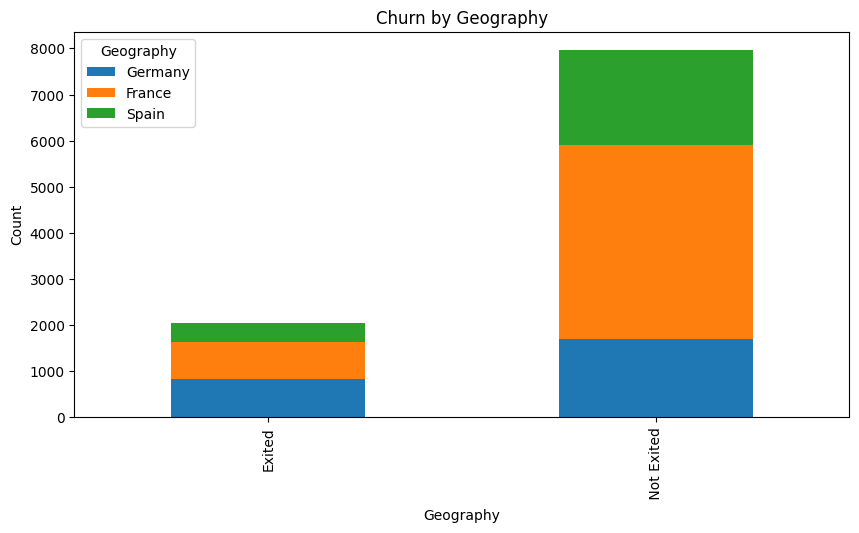

In [77]:
churn_bar_chart('Geography')

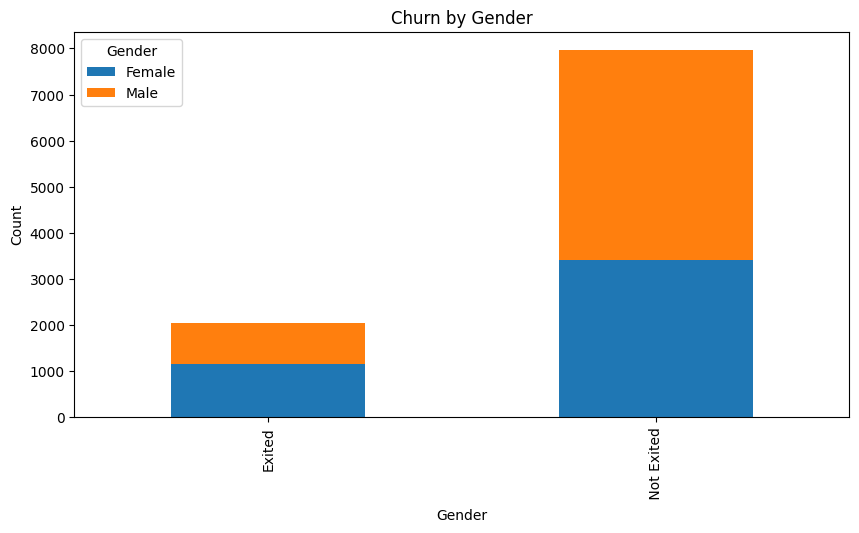

In [78]:
churn_bar_chart('Gender')

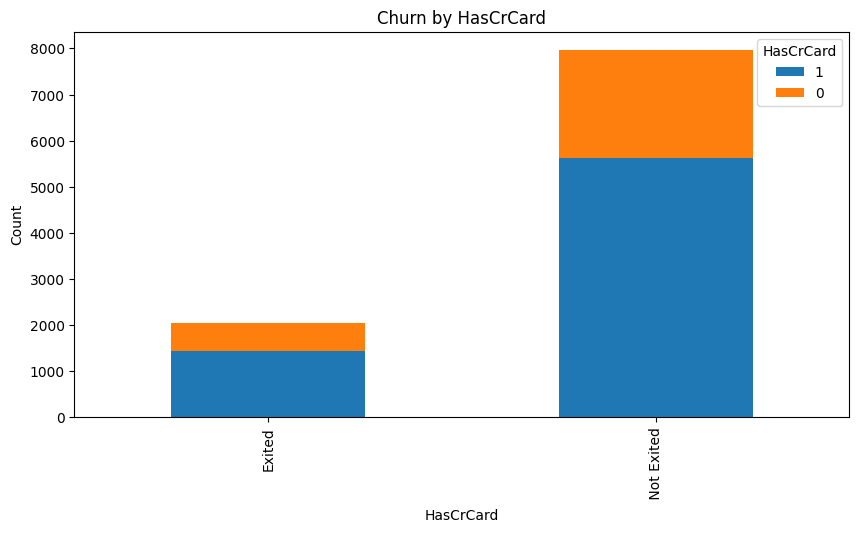

In [79]:
churn_bar_chart('HasCrCard')

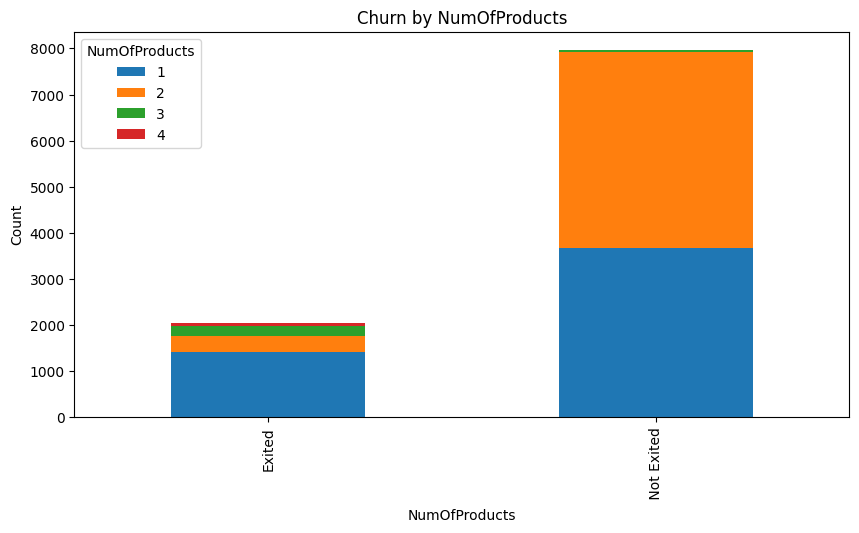

In [80]:
churn_bar_chart('NumOfProducts')

In [134]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [135]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 6252 to 4705
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        3000 non-null   int64  
 1   Age                3000 non-null   int64  
 2   Tenure             3000 non-null   int64  
 3   Balance            3000 non-null   float64
 4   NumOfProducts      3000 non-null   int64  
 5   HasCrCard          3000 non-null   int64  
 6   IsActiveMember     3000 non-null   int64  
 7   EstimatedSalary    3000 non-null   float64
 8   Geography_Germany  3000 non-null   bool   
 9   Geography_Spain    3000 non-null   bool   
 10  Gender_Male        3000 non-null   bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 219.7 KB


In [136]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 9069 to 7270
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7000 non-null   int64  
 1   Age                7000 non-null   int64  
 2   Tenure             7000 non-null   int64  
 3   Balance            7000 non-null   float64
 4   NumOfProducts      7000 non-null   int64  
 5   HasCrCard          7000 non-null   int64  
 6   IsActiveMember     7000 non-null   int64  
 7   EstimatedSalary    7000 non-null   float64
 8   Geography_Germany  7000 non-null   bool   
 9   Geography_Spain    7000 non-null   bool   
 10  Gender_Male        7000 non-null   bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 512.7 KB


In [137]:
# Select features (drop unnecessary columns like RowNumber, CustomerId, Surname)
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
# Select the target variable
y = df['Exited']  # Ensure this is a 1D array

### OneHot Enconding

In [140]:
X= pd.get_dummies(X, drop_first=True)

### Training the Model & Evaluate

### LogisticRegession

In [141]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [143]:
# Evaluate the model
score = lr.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8006666666666666


### Prediction

In [148]:
predictions = lr.predict(X_test)

In [149]:
predict_proba = lr.predict_proba(X_test)

### Accuracy

In [150]:
accuracy_score(y_test, predictions)

0.8006666666666666

### Confusion Matrix

In [168]:
confusion_matrix(y_test, prediction)

array([[2106,  310],
       [ 287,  297]])

In [151]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.44      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000



### Build the Models

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

### Dicision Tree

In [146]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Predict

In [152]:
prediction=dt.predict(X_test)

### Accuracy

In [155]:
accuracy_score(y_test, prediction)*100

80.10000000000001

### Confusion Matrix

In [156]:
confusion_matrix(y_test, prediction)

array([[2106,  310],
       [ 287,  297]])

In [157]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2416
           1       0.49      0.51      0.50       584

    accuracy                           0.80      3000
   macro avg       0.68      0.69      0.69      3000
weighted avg       0.80      0.80      0.80      3000



### RandomForest

In [158]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict

In [159]:
prediction=dt.predict(X_test)

### Accuracy

In [160]:
accuracy_score(y_test, prediction)*100

80.10000000000001

### Confusion Matrix

In [161]:
confusion_matrix(y_test, prediction)

array([[2106,  310],
       [ 287,  297]])

In [162]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2416
           1       0.49      0.51      0.50       584

    accuracy                           0.80      3000
   macro avg       0.68      0.69      0.69      3000
weighted avg       0.80      0.80      0.80      3000



### GrandientBoosting

In [163]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Predict

In [164]:
prediction=dt.predict(X_test)

### Accuuracy

In [165]:
accuracy_score(y_test, prediction)*100

80.10000000000001

### Confusion Matrix

In [166]:
confusion_matrix(y_test, prediction)

array([[2106,  310],
       [ 287,  297]])

In [167]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2416
           1       0.49      0.51      0.50       584

    accuracy                           0.80      3000
   macro avg       0.68      0.69      0.69      3000
weighted avg       0.80      0.80      0.80      3000

